In [ ]:
import tensorflow as tf

Dataset

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

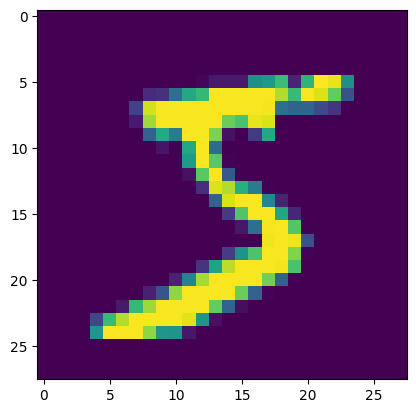

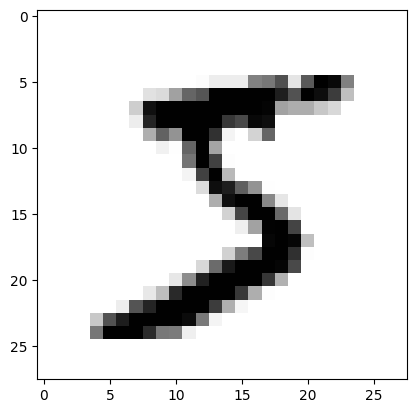

In [ ]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

Checking Value of Pixels

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Normalizing the Data

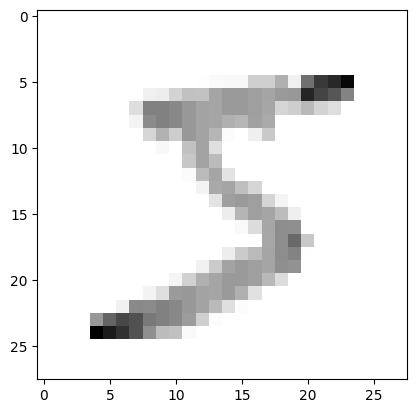

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

After Normalization

In [ ]:
print(x_train[0]) # Range 0 to 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


Image Resizing

In [ ]:
!pip install numpy

In [ ]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


Deep Neural Network

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

#1st Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:] ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:] ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

##3rd Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:] ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully connected Layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully connected Layer
model.add(Dense(10))
model.add(Activation("softmax")) #Multiclass Activation Function


In [ ]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_11 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_12 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [ ]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [ ]:
model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 73s 54ms/step - loss: 0.3332 - accuracy: 0.8929 - val_loss: 0.1387 - val_accuracy: 0.9584
Epoch 2/5
1313/1313 [==============================] - 70s 53ms/step - loss: 0.1049 - accuracy: 0.9680 - val_loss: 0.0823 - val_accuracy: 0.9745
Epoch 3/5
1313/1313 [==============================] - 66s 50ms/step - loss: 0.0734 - accuracy: 0.9775 - val_loss: 0.0703 - val_accuracy: 0.9789
Epoch 4/5
1313/1313 [==============================] - 65s 50ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0733 - val_accuracy: 0.9773
Epoch 5/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0651 - val_accuracy: 0.9795


In [55]:
model.save("recognize.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Val Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0613 - accuracy: 0.9825
Test loss on 10,000 test samples 0.06133632734417915
Val Accuracy on 10,000 test samples 0.9825000166893005


In [ ]:
predictions = model.predict(x_testr)

313/313 [==============================] - 6s 17ms/step


In [ ]:
print(predictions)

[[3.9275494e-07 2.4953291e-05 4.6291840e-05 ... 9.9989432e-01
  9.8188359e-08 8.2147262e-06]
 [5.3234198e-03 8.4603838e-05 9.9435228e-01 ... 1.0853438e-04
  6.1665582e-05 2.0021260e-05]
 [1.3933518e-06 9.9995965e-01 1.3226035e-05 ... 1.3841308e-05
  6.1884275e-06 1.5448900e-07]
 ...
 [1.0558932e-08 1.8950580e-07 1.3432130e-07 ... 6.2914382e-06
  8.2682991e-06 1.0539603e-05]
 [1.2600453e-06 3.6716841e-08 1.1238530e-08 ... 8.0299616e-09
  2.8267680e-04 4.6588539e-08]
 [7.7551296e-05 5.3186016e-09 4.1921635e-06 ... 8.1170753e-10
  9.3037897e-06 2.5359843e-06]]


In [ ]:
print(np.argmax(predictions[0]))

7


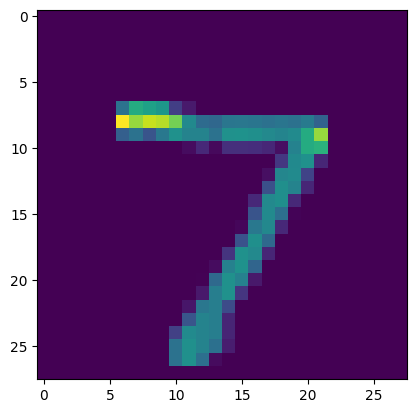

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print(np.argmax(predictions[128]))

8


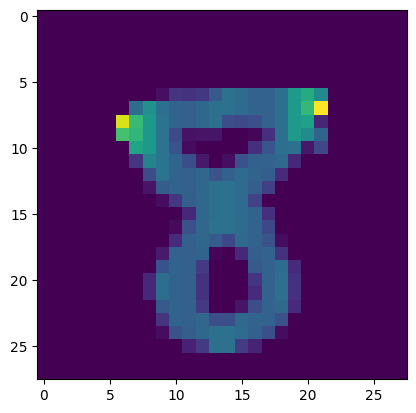

In [ ]:
plt.imshow(x_test[128])

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/3.jpg')

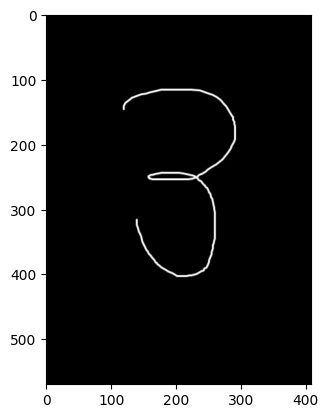

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(570, 409, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(570, 409)

In [ ]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [ ]:
resized.shape

(28, 28)

In [ ]:
newimg = tf.keras.utils.normalize (resized, axis = 1)

In [ ]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [ ]:
newimg.shape

(1, 28, 28, 1)

In [ ]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 39ms/step


In [ ]:
print(np.argmax(predictions))

3


In [56]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.1 MB/s eta 0:

In [60]:
import gradio as gr

# Define a Gradio function
def predict_digit(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalize the image
    newimg = tf.keras.utils.normalize(resized, axis=1)

    # Reshape the image for model input
    newimg = np.array(newimg).reshape(-1, 28, 28, 1)

    # Make a prediction using your model
    predictions = model.predict(newimg)

    # Get the predicted digit
    predicted_digit = np.argmax(predictions)

    return str(predicted_digit)

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_digit,
    inputs="webcam",
    outputs="text",
    live=True,
    title="Handwritten Digit Recognition",
    description="Show your handwritten digit on the webcam and get the predicted digit.",
)

# Launch the interface
iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>